In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import math
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import random

In [49]:
data = pd.read_csv('ba.csv')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Тяжесть           174 non-null    int64  
 1   Уровень_VIP       104 non-null    float64
 2   Уровень_SP        104 non-null    float64
 3   SNP_rs896         104 non-null    float64
 4   SNP_rs2072100     104 non-null    float64
 5   SNP_rs3771829     104 non-null    float64
 6   SNP_rs3823082     102 non-null    float64
 7   VAR_mc            174 non-null    int64  
 8   aVNN_mc           174 non-null    int64  
 9   SDNN_mc           174 non-null    int64  
 10  pNN50             174 non-null    int64  
 11  rMSSD             174 non-null    int64  
 12  SDNNidx_mc        174 non-null    int64  
 13  SDANN_mc          174 non-null    int64  
 14  VLF               174 non-null    int64  
 15  LF_Симпатика      174 non-null    int64  
 16  HF_Парасимпатика  174 non-null    int64  
 1

In [53]:
data.head()

,Тяжесть,Уровень_VIP,Уровень_SP,SNP_rs896,SNP_rs2072100,SNP_rs3771829,SNP_rs3823082,VAR_mc,aVNN_mc,SDNN_mc,pNN50,rMSSD,SDNNidx_mc,SDANN_mc,VLF,LF_Симпатика,HF_Парасимпатика,nHF,CBBP,LF_HF
0,1,197.39,0.0,0.0,1.0,0.0,2.0,1412,948,157,3,27,46,149,1644,666,173,21,1423,3.849711
1,1,NaN,NaN,NaN,NaN,NaN,NaN,922,923,123,4,28,64,100,2998,996,236,19,1493,4.220339
2,1,NaN,NaN,NaN,NaN,NaN,NaN,922,923,123,4,28,64,100,2998,996,236,19,1493,4.220339
3,1,163.30,0.0,1.0,1.0,0.0,2.0,1008,874,138,8,35,67,119,2759,2196,304,12,2132,7.223684
4,1,63.97,0.0,1.0,1.0,0.0,0.0,1568,947,116,2,28,59,88,2362,685,146,18,1922,4.691781


In [52]:
for i in range(len(data['Тяжесть'])):
    if data.loc[i,'Тяжесть'] == 2:
        data.loc[i,'Тяжесть'] = 0
    else:
        data.loc[i,'Тяжесть'] = 1
        

In [8]:
#необходимо обозначить какие переменные к какой группе относятся
scale = [
    'Уровень_VIP',
    'Уровень_SP',
    'VAR_mc',         
    'aVNN_mc',        
    'SDNN_mc',        
    'pNN50',          
    'rMSSD',          
    'SDNNidx_mc',     
    'SDANN_mc',      
    'VLF',           
    'LF_Симпатика',   
    'HF_Парасимпатика', 
    'nHF',              
    'CBBP',             
    'LF_HF', 
]
# categorial = ['SNP_rs896',
#     'SNP_rs2072100',
#     'SNP_rs3771829',
#     'SNP_rs3823082',
#     'Тяжесть']

TARGET = 'Тяжесть'
name_group = ['СТБА', 'ТБА']

In [13]:
spisok_group = scale

#обозначение групп

name_group = ['СТБА', 'ТБА']

In [95]:
#рисование графика на 2 категории
def box_plot_2_group(group):
    data_vr = data[[TARGET,group]]
    data_vr = data_vr.dropna()
    # Получить виды, отсортированные по алфавиту
    species = sorted(data_vr[TARGET].unique())
    # y_data_vr — это список длины 3, содержащий значения bill_length_mm для каждого вида.
    y_data_vr = [data_vr[data_vr[TARGET] == specie][group].values for specie in species]
 
    # Colors
    BG_WHITE = "#ffffff"
    # ffffff делый
    GREY_LIGHT = "#b4aea9"
    GREY50 = "#7F7F7F"
    BLUE_DARK = "#1B2838"
    BLUE = "#2a475e"
    BLACK = "#282724"
    GREY_DARK = "#000e28"
    RED_DARK = "#173063"
    
   
    # Горизонтальные позиции для скрипки.
    # Это произвольные числа. Например, они могли быть [-1, 0, 1].
    POSITIONS = [0, 1]
    
    # Horizontal lines надо потом вычислит формулой
    if data_vr[group].max() > 500:
        HLINES = [(math.floor(data_vr[group].min()/50))*50 , 
                  math.floor(((math.floor(data_vr[group].min()/50))*50 + (math.ceil(data_vr[group].max()/50))*50)/2), 
                  (math.ceil(data_vr[group].max()/50))*50 ]
    elif data_vr[group].max() > 100:
        HLINES = [(math.floor(data_vr[group].min()/10))*10 , 
                  math.floor(((math.floor(data_vr[group].min()/10))*10 + (math.ceil(data_vr[group].max()/10))*10)/2), 
                  (math.ceil(data_vr[group].max()/10))*10 ]
    elif data_vr[group].max() > 20: 
        HLINES = [(math.floor(data_vr[group].min()/5))*5 , 
                  math.floor(((math.floor(data_vr[group].min()/5))*5 + (math.ceil(data_vr[group].max()/5))*5)/2), 
                  (math.ceil(data_vr[group].max()/5))*5 ]    
    else:
        HLINES = [(math.floor(data_vr[group].min())) , 
                  math.floor(((math.floor(data_vr[group].min())) + (math.ceil(data_vr[group].max())))/2), 
                  (math.ceil(data_vr[group].max()))]        

    fig, ax = plt.subplots(figsize= (10, 6))

    # Немного макета -------------------------------------------------------------
    # Фоновый цвет
    fig.patch.set_facecolor(BG_WHITE)
    ax.set_facecolor(BG_WHITE)
    
    # # Горизонтальные линии, которые используются в качестве ориентира шкалы
    for h in HLINES:
        ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

    # Добавление диаграмм -------------------------------------------------------------- ----
    # Обратите внимание, что свойства медианы и прямоугольника передаются
    # как словари.

    medianprops = dict(
        linewidth=4, 
        color=GREY_DARK,
#        solid_capstyle="butt"
    )
    boxprops = dict(
        linewidth=2, 
        color=GREY_DARK,
        #hatch = '/'
    )
    whiskerprops = dict(
        linewidth=2, 
        color=GREY_DARK,
    )

    bp = ax.boxplot(
        y_data_vr, widths = 0.25,
        positions=POSITIONS, 
        patch_artist=True,
    #    showfliers = True, # Do not show the outliers beyond the caps.
    #    showcaps = False,   # Do not show the caps
        medianprops = medianprops,
        whiskerprops = whiskerprops,
        boxprops = boxprops,
        notch=True 
        #, showmeans = True,
    )
#    for box in bp['boxes']:
#    # change fill color
#    box.set(facecolor = 'green' )
#    # change hatch
#    box.set(hatch = '/')
    
    bp['boxes'][0].set_facecolor('#b3cdff')
    bp['boxes'][1].set_facecolor('#3c5e9e')
#    bp['boxes'][0].set_hatch('/')
    #Добавить метки среднего значения
    means = [y.mean() for y in y_data_vr]
    for i, mean in enumerate(means):
        # Добавить точку, представляющую среднее значение
        ax.scatter(i, mean, s=250, color=RED_DARK, zorder=3)
    
        # Добавляем строку, соединяющую среднее значение и его метку
        ax.plot([i, i + 0.25], [mean, mean], ls="dashdot", color="black", zorder=3)
    
        # Добавить метку среднего значения.
        ax.text(
            i + 0.25,
            mean,
            r"$\hat{\mu}_{\rm{mean}} = $" + str(round(mean, 2)),
            fontsize=13,
            va="center",
            bbox = dict(
                facecolor="white",
                edgecolor="black",
                boxstyle="round",
                pad=0.15
            ),
            zorder=10 # чтобы убедиться, что строка находится сверху
        )
    
    # Настройка макета --------------------------------------------------------------
    ax.spines["right"].set_color(GREY_LIGHT)
    ax.spines["top"].set_color(GREY_LIGHT)
  
    # Настроить цвет шипов
    ax.spines["left"].set_color(GREY_LIGHT)
    ax.spines["bottom"].set_color(GREY_LIGHT)
    
    # Настройка меток и галочек
    ax.tick_params(length=0)
    ax.set_yticks(HLINES)
    ax.set_yticklabels(HLINES, size=15)
    ax.set_ylabel(group, size=18, weight="bold")
    
    # xlabels учитывает размер выборки для каждого вида
    name_group = ['СТБА', 'ТБА']
    xlabels = [f"{name_group[specie]}\n(n={y_data_vr[i].size})" for i, specie in enumerate(species)]
    ax.set_xticks(POSITIONS)
    ax.set_xticklabels(xlabels, size=15, ha="center", ma="center")
#    ax.set_xlabel("Группа", size=18, weight="bold")
 
    plt.show()
    print(f'Рисунок ?. Распределение и средние значение {group} в группах {name_group[0]} и {name_group[1]}.')
    return

In [96]:
#Статистики
def descriptive_statistics_for_mean(i):
    group = i
    data_vr = data[[TARGET,group]]
    data_vr = data_vr.dropna()
    species = sorted(data_vr[TARGET].unique())
    data_stat = [data_vr[data_vr[TARGET] == specie][group].values for specie in species]
    data_stat2 = {
        'Mean':[f'{data_stat[specie].mean():.2f}' for specie in species], 
        'SE':[f'{(data_stat[specie].std()/np.sqrt(len(data_stat[specie]))):.2f}' for specie in species],
        'Mean±SE' : [f'{data_stat[specie].mean():.2f}±'
                     f'{(data_stat[specie].std()/np.sqrt(len(data_stat[specie]))):.2f}' for specie in species
                    ],
        'Q1(25%)': [f'{np.quantile([data_stat[specie]], 0.25):.2f}' for specie in species],
        'Median(25%)': [f'{np.quantile([data_stat[specie]], 0.5):.2f}' for specie in species],
        'Q3(75%)': [f'{np.quantile([data_stat[specie]], 0.75):.2f}' for specie in species],
        'Median [Q1-Q3]' : [
            f'{np.quantile([data_stat[specie]], 0.5):.2f} [{np.quantile([data_stat[specie]], 0.25):.2f}-'
            f'{np.quantile([data_stat[specie]], 0.75):.2f}]' for specie in species
        ]
    } 

    # Creates pandas DataFrame. 
    df = pd.DataFrame(data_stat2, index =[f'{name_group[specie]}' for specie in species]) 
    display(df)
    return

In [136]:
def normal_test(i):
    alpha = 0.05
    group = i
    data_vr = data[[TARGET,group]]
    data_vr = data_vr.dropna()
    species = sorted(data_vr[TARGET].unique())
    
    data_stat = [data_vr[data_vr[TARGET] == specie][group].values for specie in species]
    
    for specie in species:
        k2, p = st.normaltest(data_stat[specie])
        if p > alpha:
            print(f'Распределение группы {name_group[specie]} соответствует нормальному распределению p={p:.4f}')
        else:
            print(f'Распределение группы {name_group[specie]} отличается от нормального распределения p={p:.4f}')

    k2, p = st.normaltest(data_vr[group])
    
    if p > alpha:
        print(f'Распределение в общей выборке соостветствует нормальному распределению p={p:.4f}')
        print()
        print(f'Рекомендуется использовать Параметрические критерии т-тест или ANOVA')
    else:
        print(f'Распределение в общей выборке отличается от нормального распределения p={p:.4f}')
        print()
        print(f'Рекомендуется использовать Непараметрические критерии или bootstrap')
    
    return

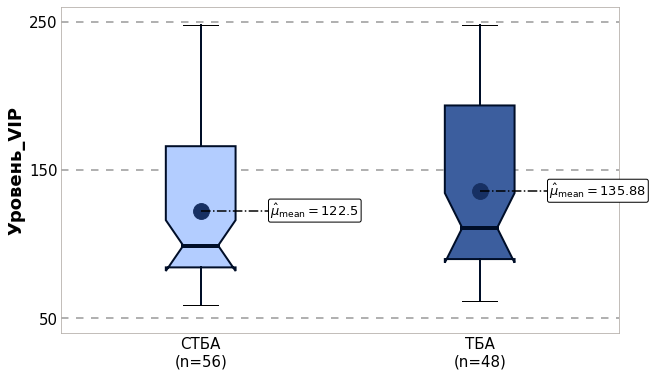

Рисунок ?. Распределение и средние значение Уровень_VIP в зависомотси в группах СТБА и ТБА.


,Mean,SE,Mean±SE,Q1(25%),Median(25%),Q3(75%),Median [Q1-Q3]
СТБА,122.50,7.29,122.50±7.29,84.19,98.90,165.93,98.90 [84.19-165.93]
ТБА,135.88,8.81,135.88±8.81,89.80,110.84,193.42,110.84 [89.80-193.42]


Распределение группы СТБА отличается от нормального распределения p=0.0475
Распределение группы ТБА отличается от нормального распределения p=0.0091
Распределение в общей выборке отличается от нормального распределения p=0.0013

Рекомендуется использовать Непараметрические критерии или bootstrap



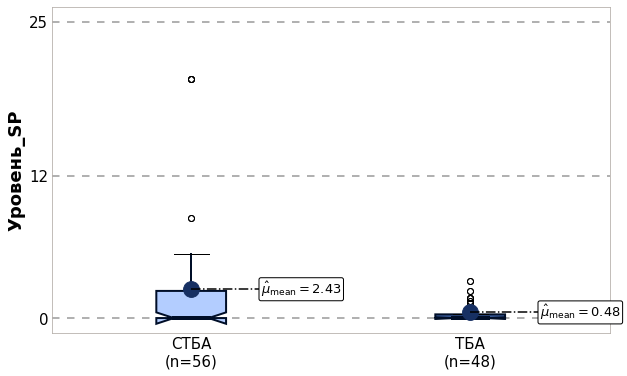

Рисунок ?. Распределение и средние значение Уровень_SP в зависомотси в группах СТБА и ТБА.


,Mean,SE,Mean±SE,Q1(25%),Median(25%),Q3(75%),Median [Q1-Q3]
СТБА,2.43,0.71,2.43±0.71,0.00,0.00,2.29,0.00 [0.00-2.29]
ТБА,0.48,0.13,0.48±0.13,0.00,0.00,0.31,0.00 [0.00-0.31]


Распределение группы СТБА отличается от нормального распределения p=0.0000
Распределение группы ТБА отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии или bootstrap



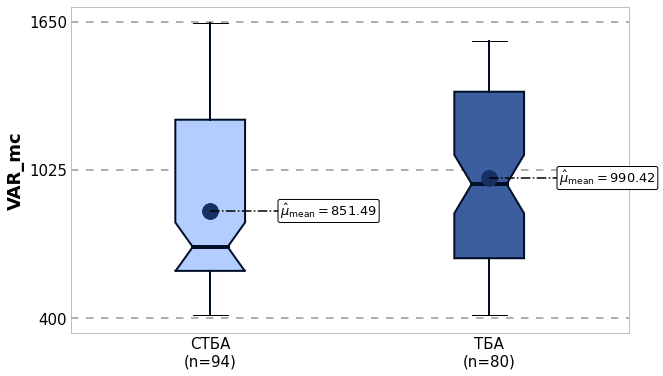

Рисунок ?. Распределение и средние значение VAR_mc в зависомотси в группах СТБА и ТБА.


,Mean,SE,Mean±SE,Q1(25%),Median(25%),Q3(75%),Median [Q1-Q3]
СТБА,851.49,35.87,851.49±35.87,599.00,700.00,1236.25,700.00 [599.00-1236.25]
ТБА,990.42,42.76,990.42±42.76,652.25,965.00,1354.25,965.00 [652.25-1354.25]


Распределение группы СТБА отличается от нормального распределения p=0.0009
Распределение группы ТБА отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии или bootstrap



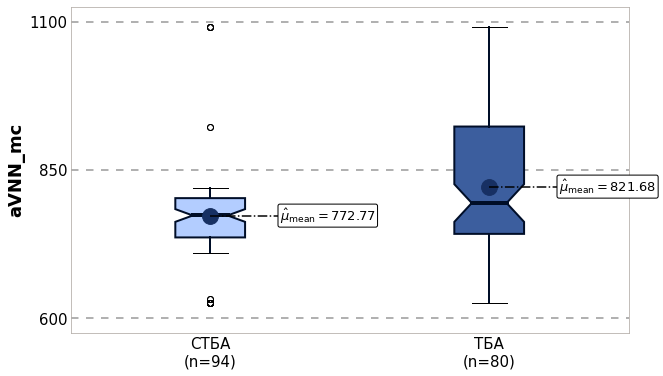

Рисунок ?. Распределение и средние значение aVNN_mc в зависомотси в группах СТБА и ТБА.


,Mean,SE,Mean±SE,Q1(25%),Median(25%),Q3(75%),Median [Q1-Q3]
СТБА,772.77,9.15,772.77±9.15,736.00,773.00,802.25,773.00 [736.00-802.25]
ТБА,821.67,12.14,821.67±12.14,742.00,794.00,923.00,794.00 [742.00-923.00]


Распределение группы СТБА отличается от нормального распределения p=0.0000
Распределение группы ТБА соответствует нормальному распределению p=0.1056
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии или bootstrap



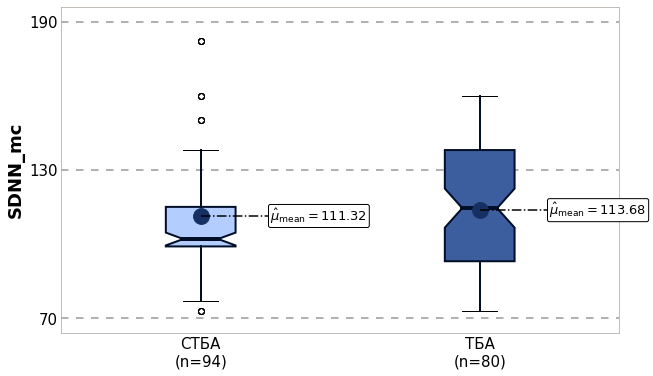

Рисунок ?. Распределение и средние значение SDNN_mc в зависомотси в группах СТБА и ТБА.


,Mean,SE,Mean±SE,Q1(25%),Median(25%),Q3(75%),Median [Q1-Q3]
СТБА,111.32,2.62,111.32±2.62,99.00,102.00,115.00,102.00 [99.00-115.00]
ТБА,113.67,3.00,113.67±3.00,93.00,114.50,138.00,114.50 [93.00-138.00]


Распределение группы СТБА отличается от нормального распределения p=0.0001
Распределение группы ТБА отличается от нормального распределения p=0.0012
Распределение в общей выборке отличается от нормального распределения p=0.0055

Рекомендуется использовать Непараметрические критерии или bootstrap



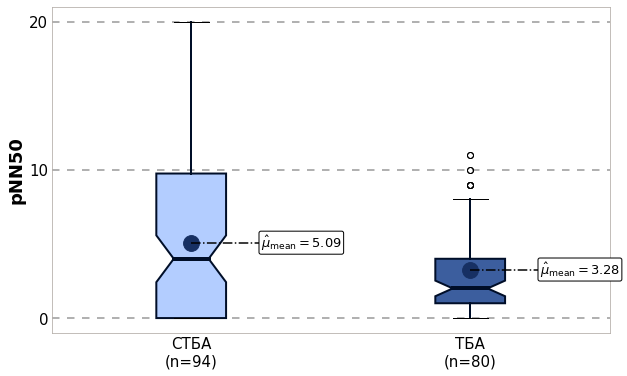

Рисунок ?. Распределение и средние значение pNN50 в зависомотси в группах СТБА и ТБА.


,Mean,SE,Mean±SE,Q1(25%),Median(25%),Q3(75%),Median [Q1-Q3]
СТБА,5.09,0.55,5.09±0.55,0.00,4.00,9.75,4.00 [0.00-9.75]
ТБА,3.27,0.36,3.27±0.36,1.00,2.00,4.00,2.00 [1.00-4.00]


Распределение группы СТБА отличается от нормального распределения p=0.0018
Распределение группы ТБА отличается от нормального распределения p=0.0030
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии или bootstrap



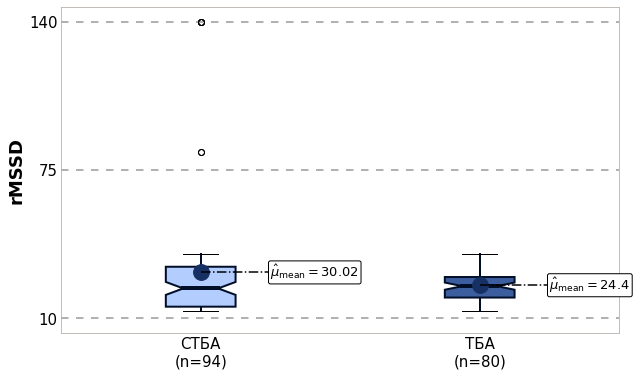

Рисунок ?. Распределение и средние значение rMSSD в зависомотси в группах СТБА и ТБА.


,Mean,SE,Mean±SE,Q1(25%),Median(25%),Q3(75%),Median [Q1-Q3]
СТБА,30.02,2.70,30.02±2.70,15.00,23.00,32.50,23.00 [15.00-32.50]
ТБА,24.40,0.77,24.40±0.77,19.00,24.00,28.00,24.00 [19.00-28.00]


Распределение группы СТБА отличается от нормального распределения p=0.0000
Распределение группы ТБА отличается от нормального распределения p=0.0096
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии или bootstrap



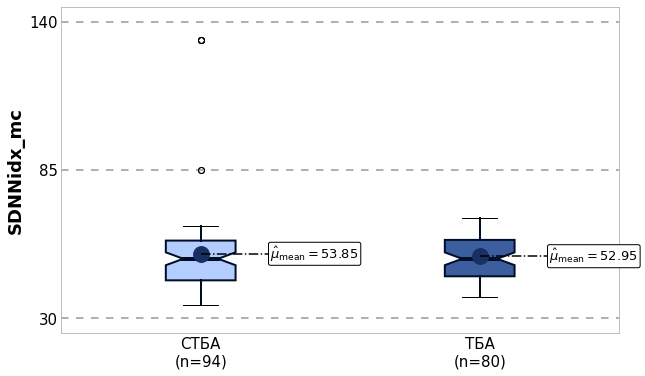

Рисунок ?. Распределение и средние значение SDNNidx_mc в зависомотси в группах СТБА и ТБА.


,Mean,SE,Mean±SE,Q1(25%),Median(25%),Q3(75%),Median [Q1-Q3]
СТБА,53.85,2.00,53.85±2.00,44.00,52.00,58.75,52.00 [44.00-58.75]
ТБА,52.95,0.97,52.95±0.97,45.50,52.00,59.00,52.00 [45.50-59.00]


Распределение группы СТБА отличается от нормального распределения p=0.0000
Распределение группы ТБА отличается от нормального распределения p=0.0007
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии или bootstrap



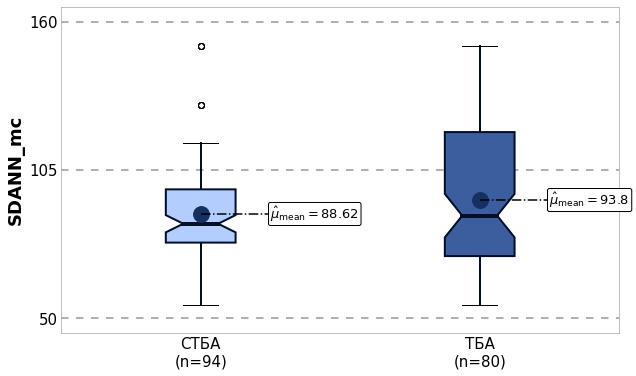

Рисунок ?. Распределение и средние значение SDANN_mc в зависомотси в группах СТБА и ТБА.


,Mean,SE,Mean±SE,Q1(25%),Median(25%),Q3(75%),Median [Q1-Q3]
СТБА,88.62,2.29,88.62±2.29,78.00,85.00,97.75,85.00 [78.00-97.75]
ТБА,93.80,3.24,93.80±3.24,73.00,88.00,119.00,88.00 [73.00-119.00]


Распределение группы СТБА отличается от нормального распределения p=0.0014
Распределение группы ТБА соответствует нормальному распределению p=0.0551
Распределение в общей выборке отличается от нормального распределения p=0.0033

Рекомендуется использовать Непараметрические критерии или bootstrap



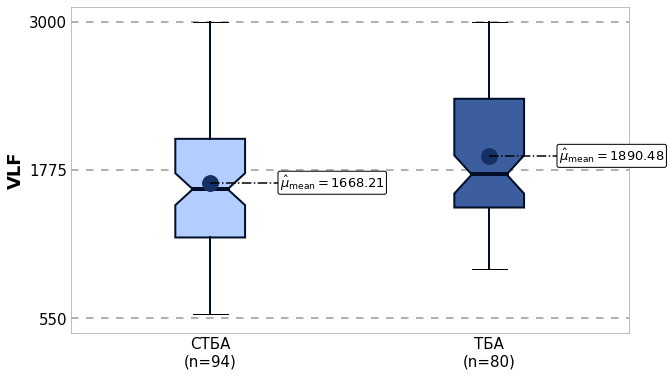

Рисунок ?. Распределение и средние значение VLF в зависомотси в группах СТБА и ТБА.


,Mean,SE,Mean±SE,Q1(25%),Median(25%),Q3(75%),Median [Q1-Q3]
СТБА,1668.21,63.40,1668.21±63.40,1216.00,1615.00,2031.00,1615.00 [1216.00-2031.00]
ТБА,1890.47,69.25,1890.47±69.25,1463.50,1736.50,2362.00,1736.50 [1463.50-2362.00]


Распределение группы СТБА соответствует нормальному распределению p=0.0878
Распределение группы ТБА отличается от нормального распределения p=0.0015
Распределение в общей выборке отличается от нормального распределения p=0.0042

Рекомендуется использовать Непараметрические критерии или bootstrap



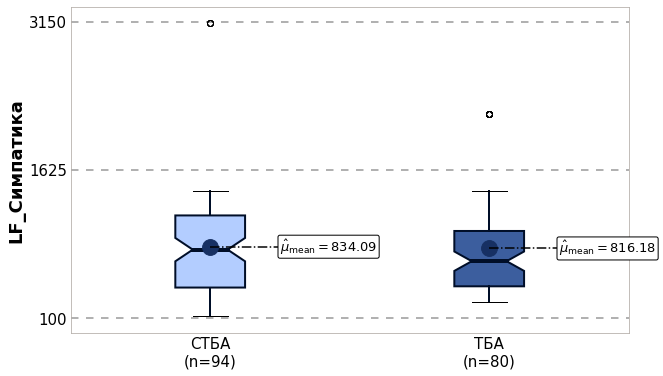

Рисунок ?. Распределение и средние значение LF_Симпатика в зависомотси в группах СТБА и ТБА.


,Mean,SE,Mean±SE,Q1(25%),Median(25%),Q3(75%),Median [Q1-Q3]
СТБА,834.09,63.99,834.09±63.99,414.00,804.00,1155.75,804.00 [414.00-1155.75]
ТБА,816.17,61.42,816.17±61.42,426.75,685.00,996.00,685.00 [426.75-996.00]


Распределение группы СТБА отличается от нормального распределения p=0.0000
Распределение группы ТБА отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии или bootstrap



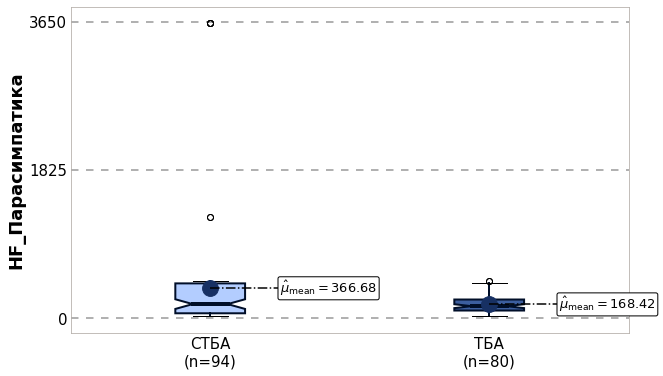

Рисунок ?. Распределение и средние значение HF_Парасимпатика в зависомотси в группах СТБА и ТБА.


,Mean,SE,Mean±SE,Q1(25%),Median(25%),Q3(75%),Median [Q1-Q3]
СТБА,366.68,74.30,366.68±74.30,59.00,172.00,427.00,172.00 [59.00-427.00]
ТБА,168.43,11.67,168.43±11.67,93.00,146.50,228.50,146.50 [93.00-228.50]


Распределение группы СТБА отличается от нормального распределения p=0.0000
Распределение группы ТБА отличается от нормального распределения p=0.0046
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии или bootstrap



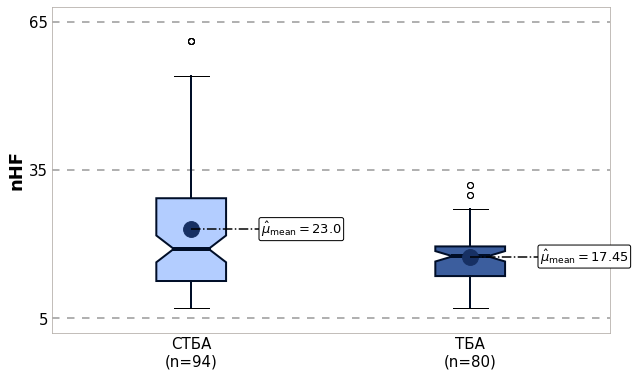

Рисунок ?. Распределение и средние значение nHF в зависомотси в группах СТБА и ТБА.


,Mean,SE,Mean±SE,Q1(25%),Median(25%),Q3(75%),Median [Q1-Q3]
СТБА,23.00,1.42,23.00±1.42,12.50,19.00,29.25,19.00 [12.50-29.25]
ТБА,17.45,0.62,17.45±0.62,13.50,17.50,19.50,17.50 [13.50-19.50]


Распределение группы СТБА отличается от нормального распределения p=0.0000
Распределение группы ТБА соответствует нормальному распределению p=0.2662
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии или bootstrap



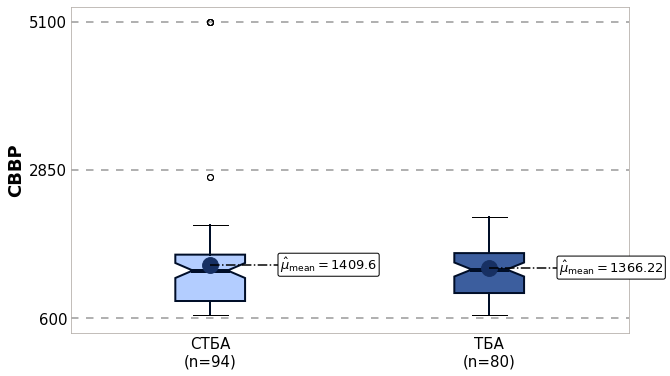

Рисунок ?. Распределение и средние значение CBBP в зависомотси в группах СТБА и ТБА.


,Mean,SE,Mean±SE,Q1(25%),Median(25%),Q3(75%),Median [Q1-Q3]
СТБА,1409.60,93.02,1409.60±93.02,859.00,1322.00,1562.75,1322.00 [859.00-1562.75]
ТБА,1366.22,48.10,1366.22±48.10,980.00,1337.00,1586.00,1337.00 [980.00-1586.00]


Распределение группы СТБА отличается от нормального распределения p=0.0000
Распределение группы ТБА отличается от нормального распределения p=0.0094
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии или bootstrap



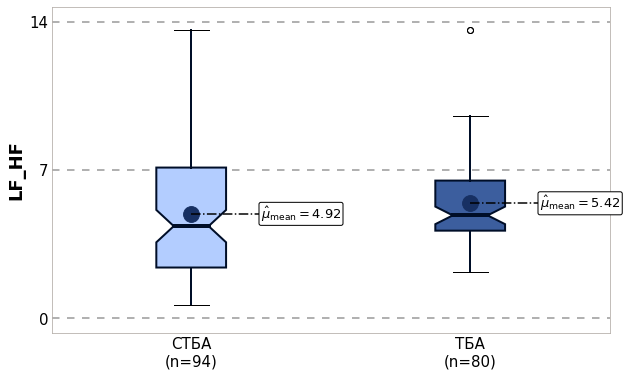

Рисунок ?. Распределение и средние значение LF_HF в зависомотси в группах СТБА и ТБА.


,Mean,SE,Mean±SE,Q1(25%),Median(25%),Q3(75%),Median [Q1-Q3]
СТБА,4.92,0.33,4.92±0.33,2.39,4.34,7.11,4.34 [2.39-7.11]
ТБА,5.42,0.26,5.42±0.26,4.13,4.85,6.49,4.85 [4.13-6.49]


Распределение группы СТБА отличается от нормального распределения p=0.0002
Распределение группы ТБА отличается от нормального распределения p=0.0000
Распределение в общей выборке отличается от нормального распределения p=0.0000

Рекомендуется использовать Непараметрические критерии или bootstrap



In [137]:
for i in spisok_group:
    box_plot_2_group(i)
    descriptive_statistics_for_mean(i)
    normal_test(i)
    print()
    print('============================================================================')

In [101]:
# def box_plot(df, x, y):
#     fig, ax = plt.subplots(figsize= (10, 5))
#     ax = sns.boxplot(
#         data=df, x=x, y=y,
#         notch=True, showmeans = True,
#         flierprops={"marker": "x"},
#         boxprops={"facecolor": (.4, .6, .8, .5)},
#         medianprops={"linewidth": "4"}, 
#         #whiskerprops = {'linewidth' : '4'} толщина уса вертикаль
#         #capprops = dict(linestyle='-', linewidth=1, color='Black'),
#         #flierprops = {'linewidth' : '4'}
#     )
#     return

In [ ]:
# Получить виды, отсортированные по алфавиту
species = sorted(data["Группа"].unique())

# y_data — это список длины 3, содержащий значения bill_length_mm для каждого вида.
y_data = [data[data["Группа"] == specie][group].values for specie in species]

# Создать искаженную версию "x" (это только 0, 1 и 2)
# Подробнее об этом в бонус-треке!
jitter = 0.04
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]



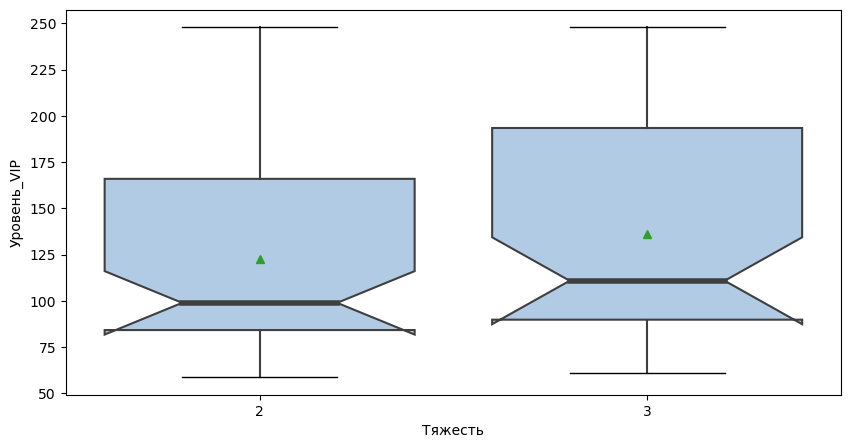

In [93]:
#box_plot(data, TARGET, 'Уровень_VIP')

In [128]:
def box_plot_2_group(group):
    # Получить виды, отсортированные по алфавиту
    species = sorted(data[TARGET].unique())
    
    # y_data — это список длины 3, содержащий значения bill_length_mm для каждого вида.
    y_data = [data[data[TARGET] == specie][group].values for specie in species]
    
    # Создать искаженную версию "x" (это только 0, 1 и 2)
    # Подробнее об этом в бонус-треке!
    jitter = 0.04
    x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
    x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

    # Colors
    BG_WHITE = "#fbf9f4"
    # ffffff делый
    GREY_LIGHT = "#b4aea9"
    GREY50 = "#7F7F7F"
    BLUE_DARK = "#1B2838"
    BLUE = "#2a475e"
    BLACK = "#282724"
    GREY_DARK = "#747473"
    RED_DARK = "#850e00"
    
    # Colors taken from Dark2 palette in RColorBrewer R library
    COLOR_SCALE = ["#9e1b1b", "#1b9e22", "#1b9a9e", "#241b9e", "#9e1b97",]
    
    # Горизонтальные позиции для скрипки.
    # Это произвольные числа. Например, они могли быть [-1, 0, 1].
    POSITIONS = [0, 1]
    
    # Horizontal lines надо потом вычислит формулой

    if data[group].max() > 100:
        HLINES = [(math.floor(data[group].min()/10))*10 , 
                  math.floor(((math.floor(data[group].min()/10))*10 + (math.ceil(data[group].max()/10))*10)/2), 
                  (math.ceil(data[group].max()/10))*10 ]
    elif data[group].max() > 20: 
        HLINES = [(math.floor(data[group].min()/5))*5 , 
                  math.floor(((math.floor(data[group].min()/5))*5 + (math.ceil(data[group].max()/5))*5)/2), 
                  (math.ceil(data[group].max()/5))*5 ]    
    else:
        HLINES = [(math.floor(data[group].min())) , 
                  math.floor(((math.floor(data[group].min())) + (math.ceil(data[group].max())))/2), 
                  (math.ceil(data[group].max()))]        

    fig, ax = plt.subplots(figsize= (14, 10))

    # Немного макета -------------------------------------------------------------
    # Фоновый цвет
    fig.patch.set_facecolor(BG_WHITE)
    ax.set_facecolor(BG_WHITE)
    
    # # Горизонтальные линии, которые используются в качестве ориентира шкалы
    for h in HLINES:
        ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

    # Добавляем скрипки -------------------------------------------------------------- -----
    # bw_method="silverman" означает пропускную способность плотности ядра
    # оценка вычисляется по эмпирическому правилу Сильвермана.
    # Подробнее об этом в бонус-треке ;)

    # Вывод сохраняется в 'скрипках', используемых для настройки их внешнего вида
    #violins = ax.violinplot(
    #    y_data, 
    #    positions=POSITIONS,
    #    widths=0.45,
    #    bw_method="silverman",
    #    showmeans=False, 
    #    showmedians=False,
    #    showextrema=False
    #)

    # Настроить скрипки (удалить заливку, настроить линию и т. д.)
    #for pc in violins["bodies"]:
    #    pc.set_facecolor("none")
    #    pc.set_edgecolor(BLACK)
    #    pc.set_linewidth(1.4)
    #    pc.set_alpha(1)
    

    # Добавление диаграмм -------------------------------------------------------------- ----
    # Обратите внимание, что свойства медианы и прямоугольника передаются
    # как словари.

    medianprops = dict(
        linewidth=4, 
        color=GREY_DARK,
        solid_capstyle="butt"
    )
    boxprops = dict(
        linewidth=2, 
        color=GREY_DARK
    )

    ax.boxplot(
        y_data,
        positions=POSITIONS, 
        showfliers = False, # Do not show the outliers beyond the caps.
    #    showcaps = False,   # Do not show the caps
        medianprops = medianprops,
        whiskerprops = boxprops,
        boxprops = boxprops
    )

    # Add jittered dots ----------------------------------------------
    for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
        ax.scatter(x, y, s = 100, color=color, alpha=0.4)
    
    # stats f_oneway functions takes the groups as input and returns ANOVA F and p value
#     fvalue, pvalue = st.f_oneway(data[data[TARGET] == species[0]][group], 
#                                  data[data[TARGET] == species[1]][group],
#                                  data[data[TARGET] == species[2]][group], 
#                                  data[data[TARGET] == species[3]][group])

    # perform multiple pairwise comparison (Tukey HSD)
#    m_comp = pairwise_tukeyhsd(endog=data[group], groups=data[TARGET], alpha=0.05)
    
    #Добавить метки среднего значения
    means = [y.mean() for y in y_data]
    for i, mean in enumerate(means):
        # Добавить точку, представляющую среднее значение
        ax.scatter(i, mean, s=250, color=RED_DARK, zorder=3)
    
        # Добавляем строку, соединяющую среднее значение и его метку
        ax.plot([i, i + 0.25], [mean, mean], ls="dashdot", color="black", zorder=3)
    
        # Добавить метку среднего значения.
        ax.text(
            i + 0.25,
            mean,
            r"$\hat{\mu}_{\rm{mean}} = $" + str(round(mean, 2)),
            fontsize=13,
            va="center",
            bbox = dict(
                facecolor="white",
                edgecolor="black",
                boxstyle="round",
                pad=0.15
            ),
            zorder=10 # чтобы убедиться, что строка находится сверху
        )

    # Добавить несколько сравнений p-значение для средней разницы -----------
    # Линии графика, указывающие, какие средства сравниваются
    # 'tick_len' задает длину галочки в конце каждой строки
    # дучше прибавлять по 4%

    if data[group].min() < 0:
        po = data[group].max() - data[group].min()
        p1 = 0.08
    else:
        po = data[group].max()
        p1 = 0.04
        
    p = po + po * p1
    
    if data[group].max() > 300:
        tick_len = 0.5
        pad = 0.2
    elif data[group].max() > 100:
        tick_len = 0.25
        pad = 0.1
    elif data[group].max() > 10:
        tick_len = 0.12
        pad = 0.05
    else: 
        tick_len = 0.025
        pad = 0.02

    #полоски со значимостью порядок полос 7 4 5 9 0 8 1 6 2 3  

    if m_comp.pvalues[7] <= 0.05:
        ax.plot([2, 2, 3, 3], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[7], 3)}"
        ax.text(2.5, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[4] <= 0.05:
        ax.plot([1, 1, 2, 2], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[4], 3)}"
        ax.text(1.5, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1
    
    if m_comp.pvalues[5] <= 0.05:
        ax.plot([1, 1, 3, 3], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[5], 3)}"
        ax.text(2, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[9] <= 0.05:
        ax.plot([3, 3, 4, 4], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[9], 3)}"
        ax.text(3.5, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1
    
    if m_comp.pvalues[0] <= 0.05:
        ax.plot([0, 0, 1, 1], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[0], 3)}"
        ax.text(0.5, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[8] <= 0.05:
        ax.plot([2, 2, 4, 4], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[8], 3)}"
        ax.text(3, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[1] <= 0.05:
        ax.plot([0, 0, 2, 2], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[1], 3)}"
        ax.text(1, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[6] <= 0.05:
        ax.plot([1, 1, 4, 4], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[6], 3)}"
        ax.text(2.5, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[2] <= 0.05:
        ax.plot([0, 0, 3, 3], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[2], 3)}"
        ax.text(1.5, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    if m_comp.pvalues[3] <= 0.05:
        ax.plot([0, 0, 4, 4], [p- tick_len, p,p,p- tick_len], c="black")
        label = f"$p_{{Tukey-correcte}}$ = {round(m_comp.pvalues[3], 3)}"
        ax.text(2, p + pad, label, fontsize=11, va="bottom", ha="center")
        p += po * p1

    # Настройка макета --------------------------------------------------------------
    # Скрыть шипы
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    
    # Настроить цвет шипов
    ax.spines["left"].set_color(GREY_LIGHT)
    ax.spines["left"].set_linewidth(2)
    ax.spines["bottom"].set_color(GREY_LIGHT)
    ax.spines["bottom"].set_linewidth(2)
    
    # Настройка меток и галочек
    ax.tick_params(length=0)
    ax.set_yticks(HLINES)
    ax.set_yticklabels(HLINES, size=15)
    ax.set_ylabel(group, size=18, weight="bold")

    # xlabels учитывает размер выборки для каждого вида
    xlabels = [f"{name_group[specie]}\n(n={y_data[i].size})" for i, specie in enumerate(species)]
    ax.set_xticks(POSITIONS)
    ax.set_xticklabels(xlabels, size=15, ha="center", ma="center")
    ax.set_xlabel("Группа", size=18, weight="bold")
    
    # Рисунок используется для заголовка, а ось — для подзаголовка.
    # Заголовок
 

    fig.suptitle(
        f"Среднее значение {group} в экспериментальных группах",
        x = 0.122,
        y = 0.975,
        ha="left",
        fontsize=26,
    #    fontname="Lobster Two",
        color=BLUE,
        weight="bold",    
    )

    # # Подзаголовок
      
    stats = [
        f"$F_{{ANOVA}}$={round(fvalue,2)}",
        f"p={round(pvalue,3)+0.001}",
        f"Pairwise test: Tukey-test"
    ]

    
    #ax.set_title(
    #    ", ".join(stats),
    #    loc="left",
    #    ha="left",
    #    fontsize=20,
    #    color=BLUE_DARK
    #)
    
    # Примечания внизу справа
    fig.text(
        0.65,
        0.03,
        ", ".join(stats),
        fontsize=10
    )
    
    plt.show()
    
    print(f' F-Anova {round(fvalue, 2)}, p = {round(pvalue, 4)}')
    print(m_comp)